In [43]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install MultiColumnLabelEncoder

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**Importing the Libraries**

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

Read The Dataset


In [54]:
data = pd.read_csv("Dataset/garments_worker_productivity.csv")

In [55]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Visualizing and analysing the data

Correlation analysis

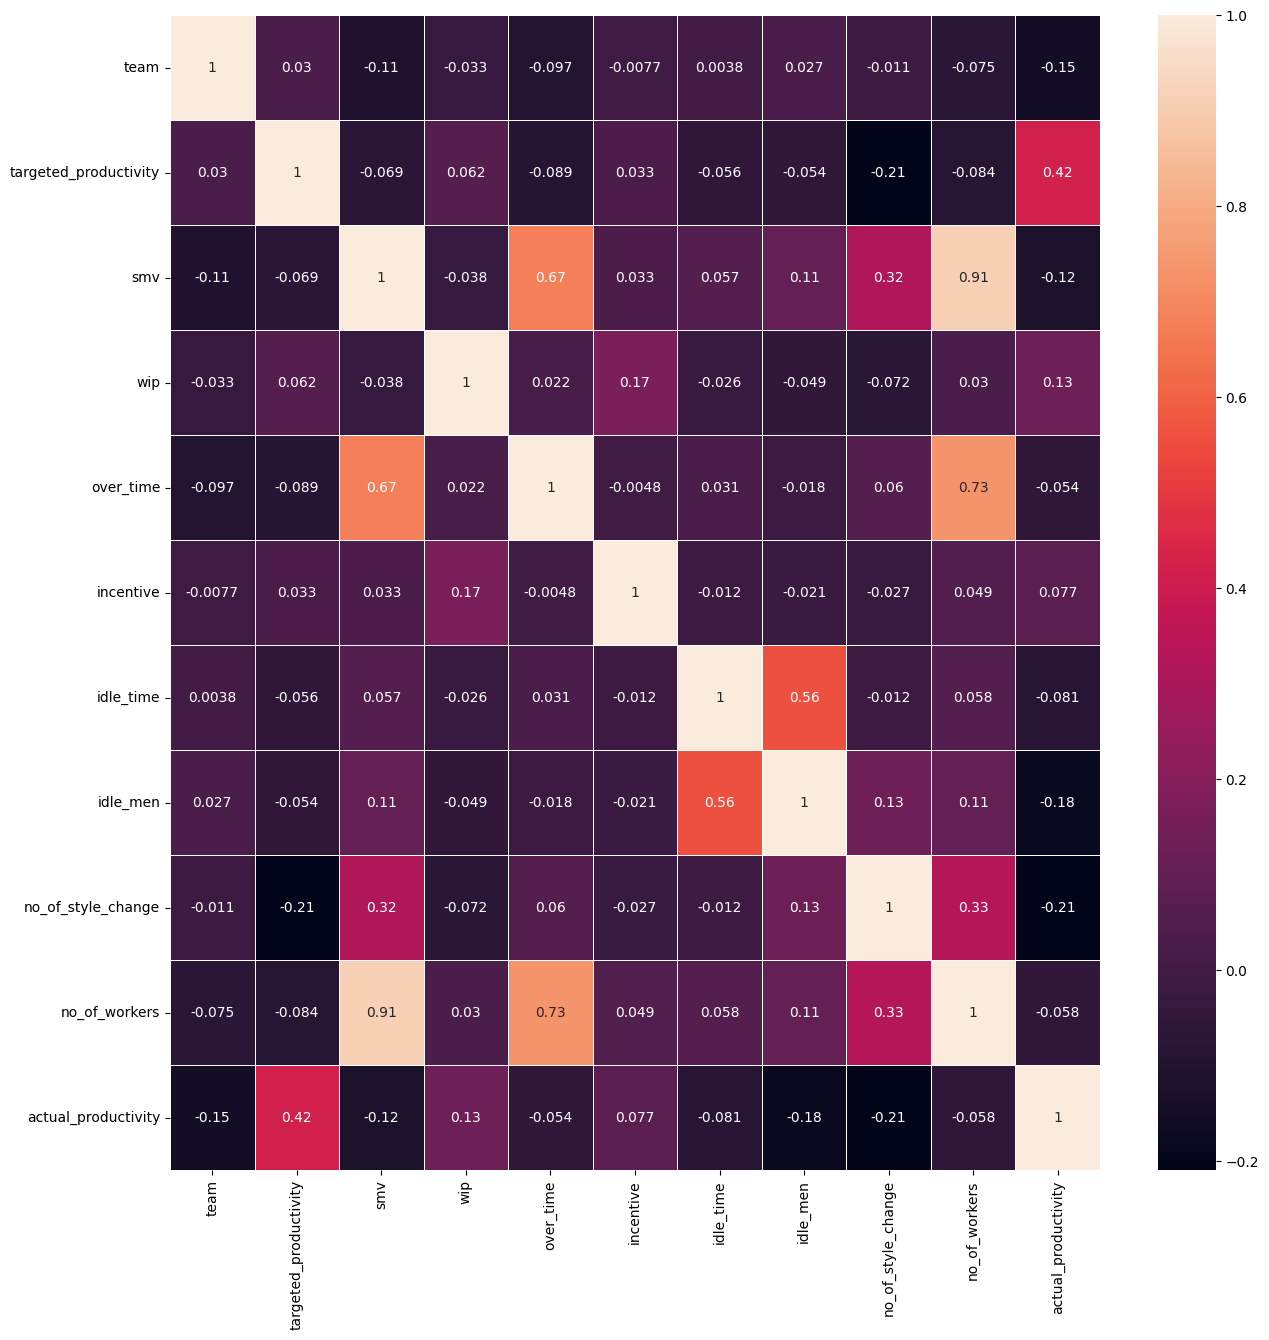

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])
corrMatrix = numeric_data.corr()  # Use numeric_data, assuming that's your numeric data DataFrame

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, linewidths=0.5, ax=ax)
plt.show()  # Add parentheses to plt.show()


Descriptive analysis

In [57]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**Data Pre-processing**

In [58]:
data.shape

(1197, 15)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Checking for null values

In [60]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [61]:
data.drop(['wip'],axis=1,inplace=True)

Handling Date & department column


In [62]:
data["date"] = pd.to_datetime(data["date"])

In [63]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [64]:
data['month'] = data['date'].dt.month
data.drop(['date'],axis=1, inplace=True)

In [65]:
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32

In [66]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [67]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sweing')
data['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

Handling Categorical Values

In [68]:
import MultiColumnLabelEncoder
mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = mcle.fit_transform(data)

Splitting data into train and test

In [69]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']

In [70]:
X=x.to_numpy()

In [71]:
X

array([[ 0. ,  0. ,  0. , ...,  0. , 59. ,  1. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  8. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. , 30.5,  1. ],
       ...,
       [ 1. ,  1. ,  5. , ...,  0. ,  8. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. , 15. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. ,  6. ,  3. ]], shape=(1197, 13))

In [72]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=0)

# Model Building

Linear Regression model

In [73]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already defined and split your training data (x_train, y_train) and test data (x_test, y_test)

# Create a linear regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(x_train, y_train)

# Now you can make predictions on the test data
pred_test = model_lr.predict(x_test)

# Calculate and print the evaluation metrics
print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print("R2_score: {}".format(r2_score(y_test, pred_test)))


test_MSE: 0.020973077246871134
test_MAE: 0.1063916426844392
R2_score: 0.2906317166092637


 Random Forest model

In [75]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)

In [76]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200, max_depth=5)

# Train the model on the training data (missing in your code)
model_rf.fit(x_train, y_train)

# Make predictions on the test data
pred = model_rf.predict(x_test)

# Calculate and print the evaluation metrics
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score: {}".format(r2_score(y_test, pred)))


test_MSE: 0.015428987909770086
test_MAE: 0.08567384848392724
R2_score: 0.47814836424908347


Xgboost model

In [77]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)

# Train the XGBoost model on the training data (missing in your code)
model_xgb.fit(x_train, y_train)

# Make predictions on the test data
pred3 = model_xgb.predict(x_test)

# Calculate and print the evaluation metrics
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score: {}".format(r2_score(y_test, pred3)))


test_MSE: 0.014514854754028826
test_MAE: 0.07633856539629594
R2_score: 0.509066910909921


 Compare the mode

Linear Regression:

In [78]:
pred_test = model_lr.predict(x_test)
print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print("R2_score: {}".format(r2_score(y_test, pred_test)))

test_MSE: 0.020973077246871134
test_MAE: 0.1063916426844392
R2_score: 0.2906317166092637


Random Forest:

In [79]:
pred = model_rf.predict(x_test)
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score: {}".format(r2_score(y_test, pred)))

test_MSE: 0.015428987909770086
test_MAE: 0.08567384848392724
R2_score: 0.47814836424908347


XGBoost:

In [80]:
pred = model_rf.predict(x_test)
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score: {}".format(r2_score(y_test, pred)))

test_MSE: 0.015428987909770086
test_MAE: 0.08567384848392724
R2_score: 0.47814836424908347


Evaluating performance of the model and saving the model

In [81]:
pred3=model_xgb.predict(x_test)
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score: {}".format(r2_score(y_test, pred3)))

test_MSE: 0.014514854754028826
test_MAE: 0.07633856539629594
R2_score: 0.509066910909921


# Application Building





 Building Html Pages:

In [82]:
#home.html
#about.html
#predict.html
#submit.html

Build Python code:

In [83]:
from flask import Flask, render_template,request
import numpy as np
import pickle

In [84]:
import pickle
pickle.dump(model_xgb,open('gwp.pkl','wb'))